<a href="https://colab.research.google.com/github/ab-rohman/4bdulRohman.github.io/blob/main/PercobaanFinalProyek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# function to display 1 image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

# function to display 2 image
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show() 

In [47]:
def color_counter(image, color = 'r'):
  try:
      print('Original size',image.shape)
  except AttributeError:
      print("shape not found")
   
  #BGR
  if color == 'r':
    lower_color_bounds = np.array([10,10,100])
    upper_color_bounds = np.array([150,100,255])
  elif color == 'w':  
    lower_color_bounds = np.array([240,240,240])
    upper_color_bounds = np.array([255,255,255])
  elif color == 'b':  
    lower_color_bounds = np.array([5,5,5])
    upper_color_bounds = np.array([90,90,90])  
  else:  
    print('INVALID COLOR')
    return 0

  mask = cv2.inRange(image,lower_color_bounds,upper_color_bounds)
  kernel = np.ones((10,10),np.float32)/100
  image_blur_gray = cv2.filter2D(mask,-1,kernel)
  image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)
  kernel = np.ones((2,2),np.uint8)
  opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 
  last_image = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, last_image =  cv2.threshold(last_image, 0.03*last_image.max(),255,0)
  last_image = last_image.astype(np.uint8)
  cnts = cv2.findContours(last_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
  display(cv2.cvtColor(image,cv2.COLOR_BGR2RGB),last_image,'original','{} selected'.format(color))
  return(len(cnts)-1)

In [48]:
def color_profile(image):
  display_one(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  r = color_counter(image,'r')
  g = color_counter(image, 'w')
  b = color_counter(image, 'b')
  print('{} red cars\n{} white cars\n{} black cars'.format(r,g,b))

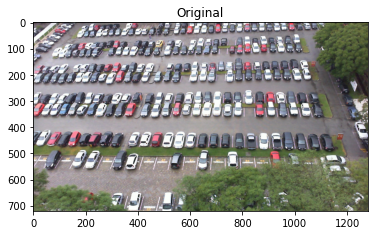

Original size (720, 1280, 3)


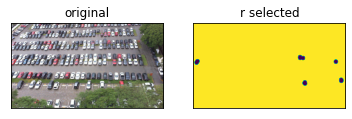

Original size (720, 1280, 3)


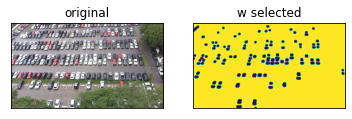

Original size (720, 1280, 3)


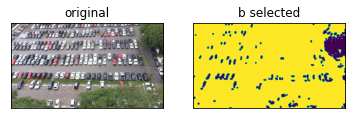

5 red cars
100 white cars
104 black cars


In [49]:
imagetry = cv2.imread("/content/drive/MyDrive/PCVK/CAR/20.jpg")
color_profile(imagetry)